In [60]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [66]:
def graddesc(A, b, x, tol):
    # Compute the negative gradient r = A^T(b-Ax)
    r = np.dot(A.transpose(),b-np.dot(A,x))
    # Start with an empty array
    xout = []
    while la.norm(r,2) > tol:
        # If the gradient is bigger than the tolerance
        Ar = np.dot(A,r)
        alpha = np.dot(r,r)/np.dot(Ar,Ar)
        x = x + alpha*r
        xout.append(x)
        r = r-alpha*np.dot(A.transpose(),Ar)
    return np.array(xout).transpose()

In [67]:
A = np.array([[1,2], [2,1], [-1,0]])
b = np.array([10, -1, 0])
tol = 1e-4
x = np.zeros(2)

traj = graddesc(A, b, x, tol)

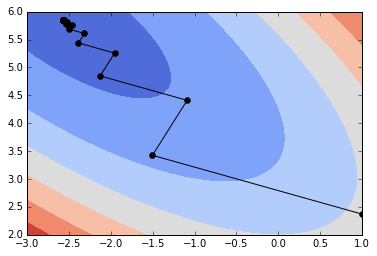

In [96]:
% matplotlib inline

# First create a contour plot to see where the minimum would be

# Define the function we aim to minimize
def f(x):
    return np.dot(np.dot(A,x)-b,np.dot(A,x)-b)

# Create a mesh grid 
xx = np.linspace(-3,1,100)
yy = np.linspace(2,6,100)
X, Y = np.meshgrid(xx, yy)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = f(np.array([X[i,j], Y[i,j]]))

# Get a nice monotone colormap
cmap = plt.cm.get_cmap("coolwarm")

# Plot the contours and the trajectory
plt.contourf(X, Y, Z, cmap = cmap)
plt.plot(traj[0,:], traj[1,:], 'o-k')
plt.show()

In [80]:
# Compare the solution with the one found by the least squares command
f(traj[:,-2])

10.28571429650831